In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import statsmodels.api as sm

C:\Users\sarac\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


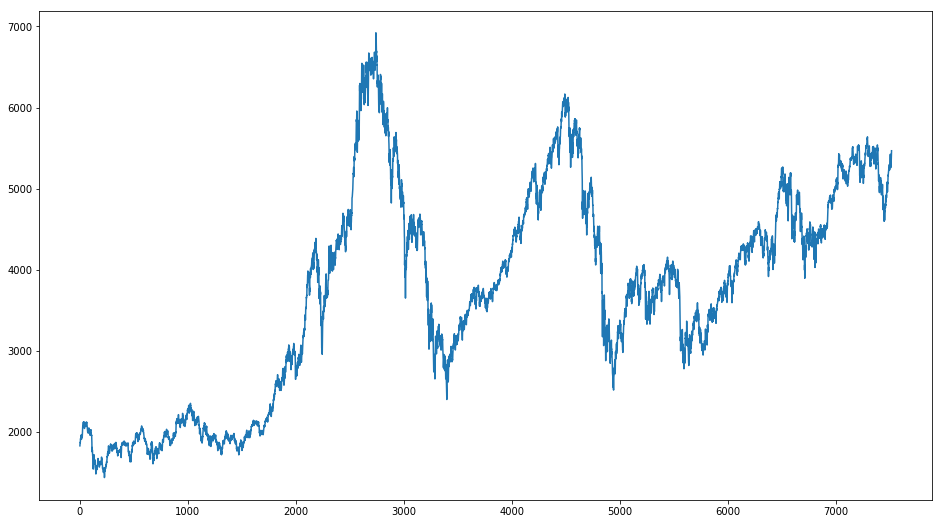

In [2]:
# data = pd.read_csv("MarketData/TWII_Daily.csv") 
data = pd.read_csv("MarketData/FCHI_CAC_Daily.csv") 
data = data.dropna()
plt.figure(figsize=(16,9))
plt.plot(data.Close)

In [3]:
max_slope = 1 + 60
max_vol = 1 + 60
for i in range(1, max_slope):
    data['r'+str(i)] = data.Close.pct_change(i)
for i in range(5, max_vol):
    data['vol'+str(i)] = data.Close.rolling(i).std()
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,r1,r2,r3,...,vol51,vol52,vol53,vol54,vol55,vol56,vol57,vol58,vol59,vol60
0,1990-03-01,1836.0,1838.0,1827.0,1832.0,1832.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-03-02,1831.0,1860.0,1831.0,1860.0,1860.0,0.0,0.015284,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-03-05,1866.0,1874.0,1862.0,1874.0,1874.0,0.0,0.007527,0.022926,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-03-06,1869.0,1875.0,1866.0,1872.0,1872.0,0.0,-0.001067,0.006452,0.021834,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-03-07,1874.0,1881.0,1874.0,1880.0,1880.0,0.0,0.004274,0.003202,0.010753,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data['Return'] = data.Close.pct_change()
data = data.dropna().iloc[100:,:].reset_index().iloc[:,1:]
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,r1,r2,r3,...,vol52,vol53,vol54,vol55,vol56,vol57,vol58,vol59,vol60,Return
0,1990-10-22,1643.0,1644.0,1632.0,1640.0,1640.0,0.0,-0.002433,-0.004250,0.014851,...,70.985510,73.073874,77.207728,79.321886,85.296694,92.878957,101.717067,109.543957,115.893283,-0.002433
1,1990-10-23,1644.0,1678.0,1643.0,1676.0,1676.0,0.0,0.021951,0.019465,0.017608,...,67.535042,70.850463,72.862710,76.885489,78.939906,84.796288,92.253760,100.969147,108.701284,0.021951
2,1990-10-24,1680.0,1682.0,1657.0,1667.0,1667.0,0.0,-0.005370,0.016463,0.013990,...,63.763571,67.342312,70.562294,72.515769,76.450026,78.458460,84.218476,91.572738,100.185132,-0.005370
3,1990-10-25,1671.0,1672.0,1643.0,1646.0,1646.0,0.0,-0.012597,-0.017900,0.003659,...,61.972991,63.366559,66.874908,70.038772,71.960704,75.841945,77.826789,83.525734,90.811500,-0.012597
4,1990-10-26,1626.0,1626.0,1609.0,1618.0,1618.0,0.0,-0.017011,-0.029394,-0.034606,...,60.172089,61.395492,62.779519,66.258534,69.400623,71.315393,75.174473,77.155929,82.823703,-0.017011


In [5]:
from scipy.signal import argrelextrema

n= 20 # number of points to be checked before and after 
# Find local peaks
reg_target = pd.DataFrame()
reg_target['Date'] = data.Date
reg_target['Close'] = data.Close
reg_target['min'] = data.iloc[argrelextrema(data.Close.values, np.less_equal, order=n)[0]]['Close']
reg_target['max'] = data.iloc[argrelextrema(data.Close.values, np.greater_equal, order=n)[0]]['Close']

reg_target['is_min'] = (reg_target['min'] > 0).astype(int) * -1 
reg_target['is_max'] = (reg_target['max'] > 0).astype(int) * 1 
reg_target['target'] = reg_target.is_min + reg_target.is_max

reg_target = reg_target.dropna(axis=1)
reg_target.head(20)

,Date,Close,is_min,is_max,target
0,1990-10-22,1640.0,0,0,0
1,1990-10-23,1676.0,0,1,1
2,1990-10-24,1667.0,0,0,0
3,1990-10-25,1646.0,0,0,0
4,1990-10-26,1618.0,0,0,0
5,1990-10-29,1628.0,0,0,0
6,1990-10-30,1613.0,0,0,0
7,1990-10-31,1645.0,0,0,0
8,1990-11-02,1639.0,0,0,0
9,1990-11-05,1620.0,0,0,0


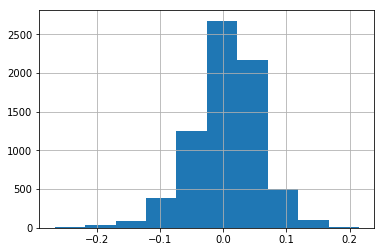

In [6]:
data.r20.hist()

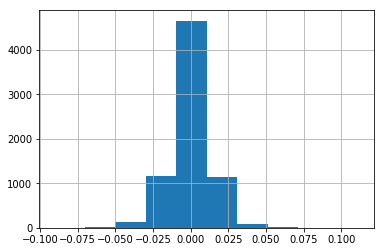

In [7]:
data.r1.hist()

In [8]:
train_start = 0
train_end = train_start+5000
test_point = 1000
X_train = data.iloc[train_start:train_end, 7:-1]
# X_train = data.iloc[train_start:train_end, 8:]

y_train = reg_target['target'].iloc[train_start:train_end].values
X_test = data.iloc[train_end:train_end+test_point, 7:-1]

# X_test = data.iloc[train_end:train_end+test_point, 8:]
y_test = reg_target['target'].iloc[train_end:train_end+test_point].values

price_train = data.Close.iloc[train_start:train_end].values
price_test = data.Close.iloc[train_end:train_end+test_point].values

In [9]:
X_train.shape, y_train.shape

((5000, 116), (5000,))

In [10]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

regr2 = RandomForestRegressor(n_estimators=50, max_depth=46, random_state=121)
regr2.fit(X_train, y_train)
print('train score : ', regr2.score(X_train, y_train))
print('test score : ', regr2.score(X_test, y_test))

train score :  0.8575967473253028
test score :  0.02913797537072482


In [11]:
pred_train = regr2.predict(X_train)
pred_test = regr2.predict(X_test)*n

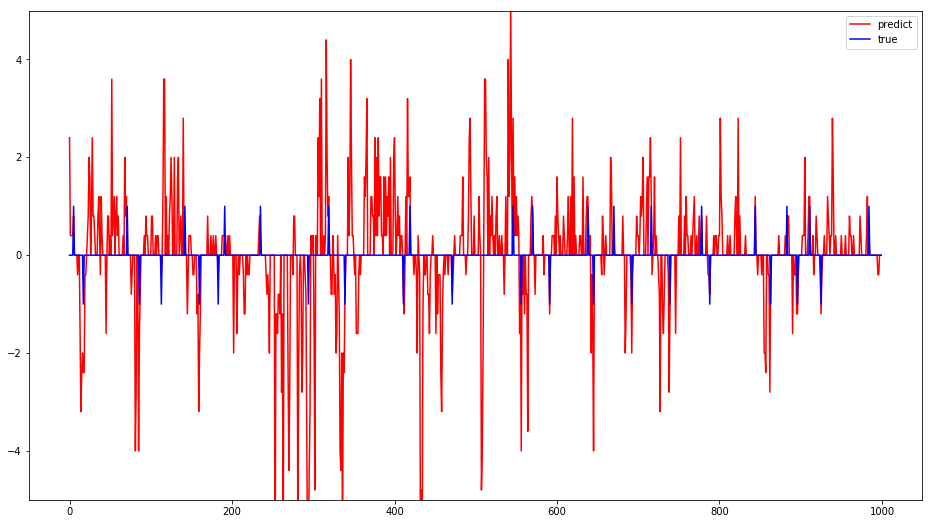

In [12]:
# plt.plot(reg_target.target)
plt.figure(figsize=(16,9))
# plt.plot(y_test.values, label='true')
plt.plot(pred_test, label='predict', color='red')
plt.plot(y_test, label='true', color='blue')
plt.ylim(-5, 5)
plt.legend()
plt.show()

In [13]:
from sklearn.externals import joblib
# regr2 = RandomForestRegressor(n_estimators=50, max_depth=33)
load_model = False 
if load_model : 
    regr2 = joblib.load('Weight/random_forest_CAC.pkl')

    print('train score : ', regr2.score(X_train, y_train))
    print('test score : ', regr2.score(X_test, y_test))

    pred_train = regr2.predict(X_train)
    pred_test = regr2.predict(X_test)*n

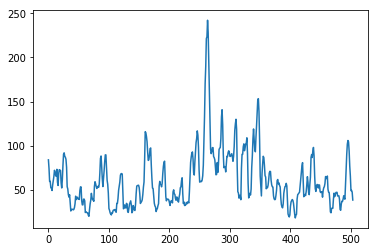

In [14]:
plt.plot(data.vol10.iloc[train_end:train_end+252*2].values)

In [15]:
action = 0 
test_length = 252*2
ret = 1
bh = 1 
log_ret = [] 
log_bh = [] 
action_vol = 5 
vol_buy = 40
vol_sell = 40
rule_buy = -1
rule_sell =  0.75
for i in range(action_vol, test_length):
    change = (price_test[i] - price_test[i-1])/price_test[i-1]
    vol = price_test[i-action_vol:i].std()
    ret = ret * (1+change*action)
    bh = bh * (1+change)
    if pred_test[i] >= rule_sell and vol >= vol_sell: 
        action = 0
    elif pred_test[i] <= rule_buy  and vol >= vol_buy:
        action = 1
    log_ret.append(ret)
    log_bh.append(bh)
print('model', ret, 'market', bh)

model 1.011924867004127 market 0.8549319651534131


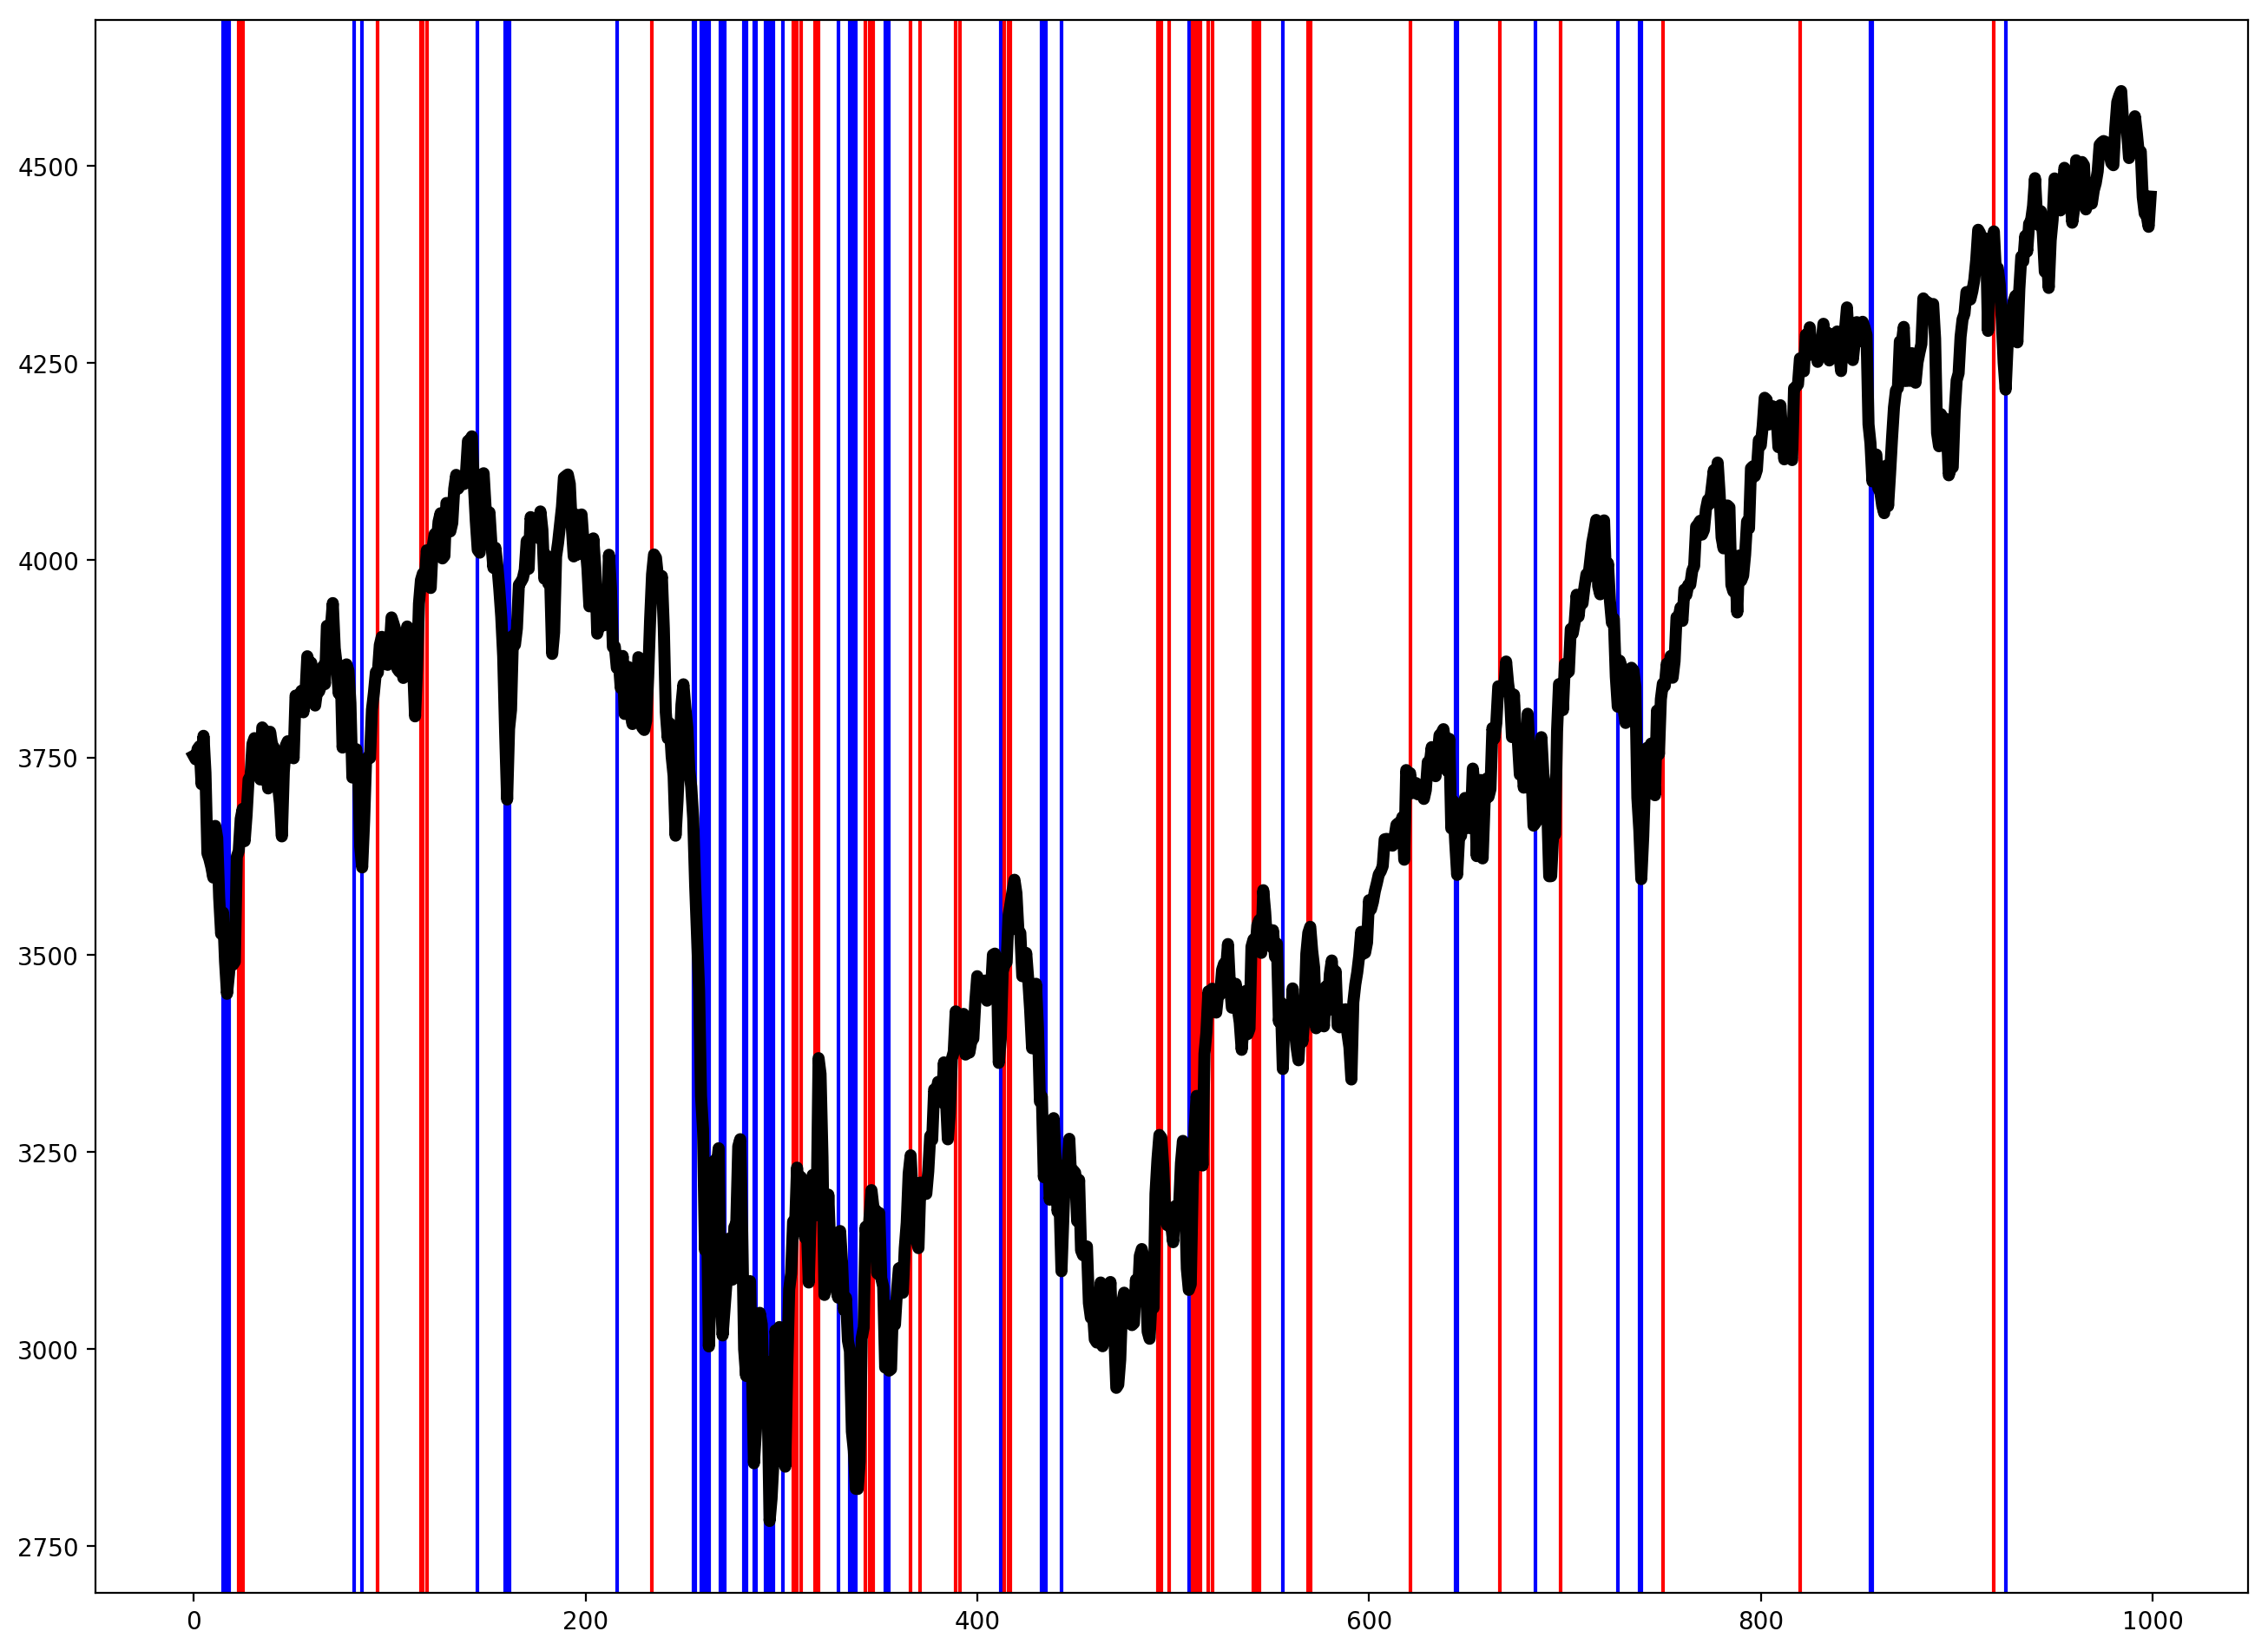

In [16]:
plt.figure(figsize=(16,12), dpi=200)
for i in range(action_vol, len(price_test)):
    vol = price_test[i-action_vol:i].std()
    if pred_test[i] >= rule_sell and vol >= vol_sell: 
        plt.axvline(i, color='red')
    elif pred_test[i] <= rule_buy  and vol >= vol_buy:
        plt.axvline(i, color='blue')   
plt.plot(price_test, color='black', linewidth=5)
plt.savefig('cac_action.png')
plt.show()

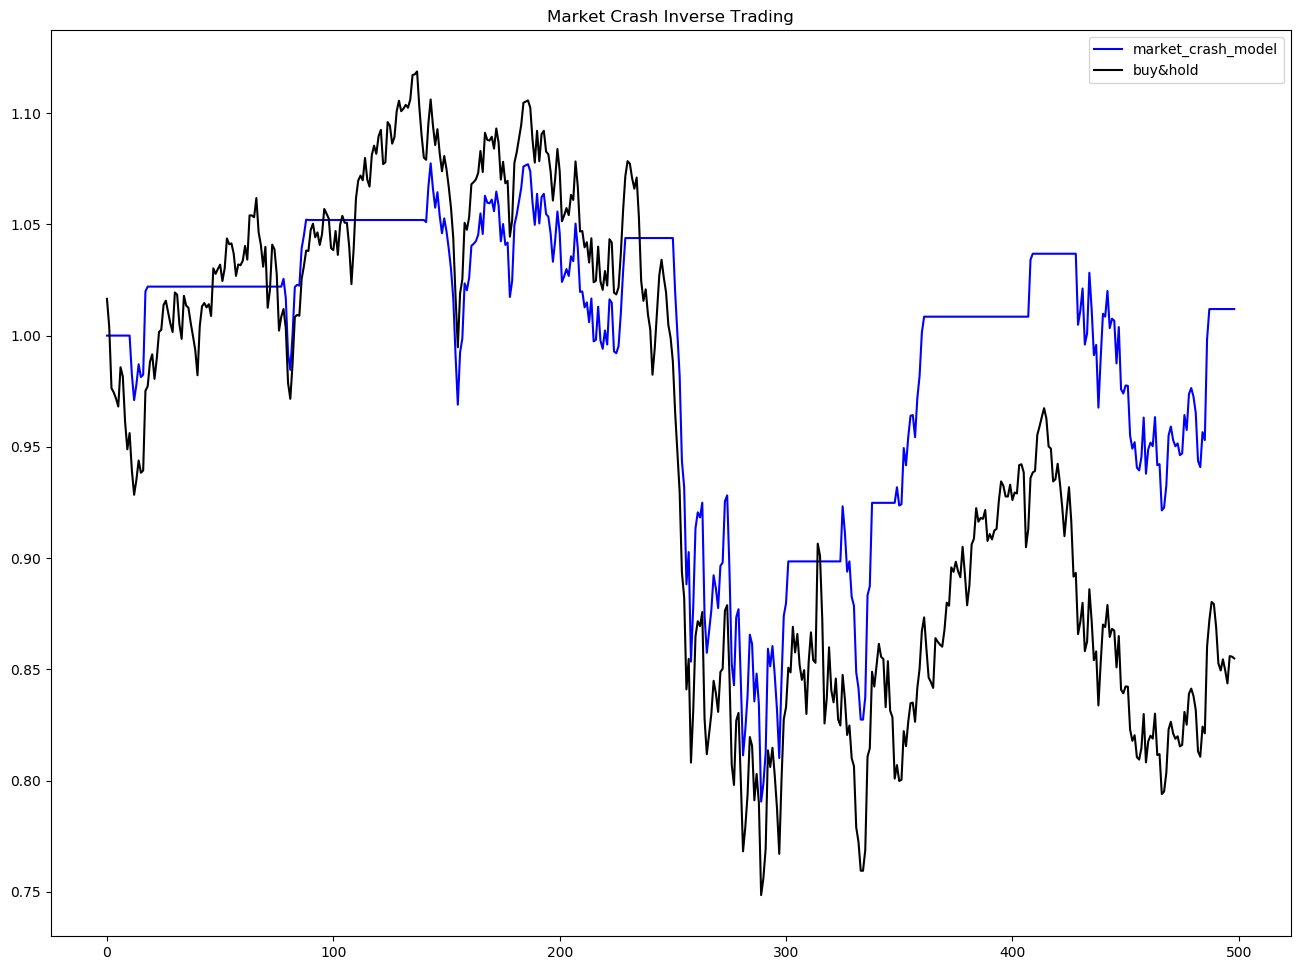

In [17]:
plt.figure(figsize=(16,12), dpi=100)
plt.title('Market Crash Inverse Trading')
plt.plot(log_ret, label='market_crash_model', color='blue')
plt.plot(log_bh, label='buy&hold', color='black')
plt.legend()
plt.show()

In [24]:
from sklearn.externals import joblib
save_model = False
if save_model : 
    joblib.dump(regr2, 'Weight/random_forest_CAC.pkl') 
    print('Save Done')

In [25]:
action = 0 
ret = 1
bh = 1 
log_ret = [] 
log_bh = [] 
for i in range(action_vol, len(price_test)):
    change = (price_test[i] - price_test[i-1])/price_test[i-1]
    vol = price_test[i-action_vol:i].std()
    ret = ret * (1+change*action)
    bh = bh * (1+change)
    if pred_test[i] >= rule_sell and vol >= vol_sell: 
        action = 0
    elif pred_test[i] <= rule_buy  and vol >= vol_buy:
        action = 1
    log_ret.append(ret)
    log_bh.append(bh)
print('model', ret, 'market', bh)

model 1.3895918269129643 market 1.2005005471335108


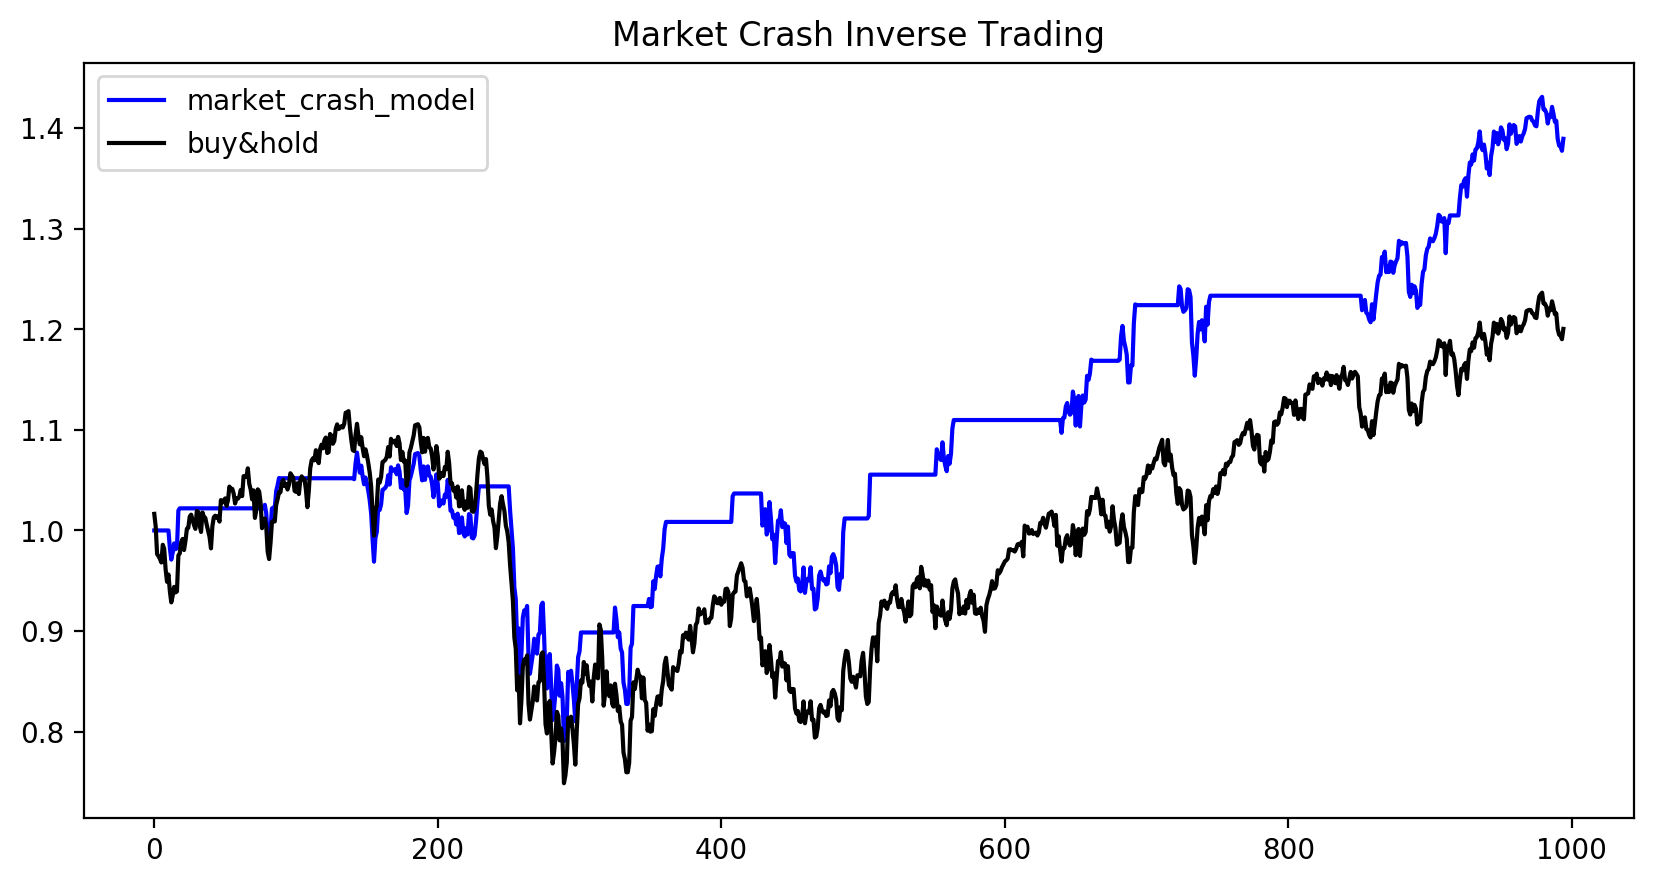

In [26]:
plt.figure(figsize=(10,5), dpi=200)
plt.title('Market Crash Inverse Trading')
plt.plot(log_ret, label='market_crash_model', color='blue')
plt.plot(log_bh, label='buy&hold', color='black')
plt.legend()
plt.savefig('cac_ret.png')
plt.show()

In [27]:
action = 0 
ret = 1
bh = 1 
log_ret = [] 
log_bh = [] 
action_vol = 5 
vol_buy = 40
vol_sell = 40
rule_buy = -1
rule_sell =  0.75
cost = 1 
move_trailing = 1.1 
stop_loss = 0.975

for i in range(action_vol, len(price_test)):
    change = (price_test[i] - price_test[i-1])/price_test[i-1]
    vol = price_test[i-action_vol:i].std()
    ret = ret * (1+change*action)
    bh = bh * (1+change)
    if pred_test[i] >= rule_sell and vol >= vol_sell: 
        action = 0
        cost = 0 
    elif pred_test[i] <= rule_buy  and vol >= vol_buy:
        if action == 0 :
            cost = ret
        action = 1
        
    if action == 1 and ret >= cost * move_trailing:
        cost = ret  
    if ret <= cost * stop_loss :
        action = 0 
        cost = 0
        
    log_ret.append(ret)
    log_bh.append(bh)
print('model', ret, 'market', bh)

model 1.4476827482076742 market 1.2005005471335108


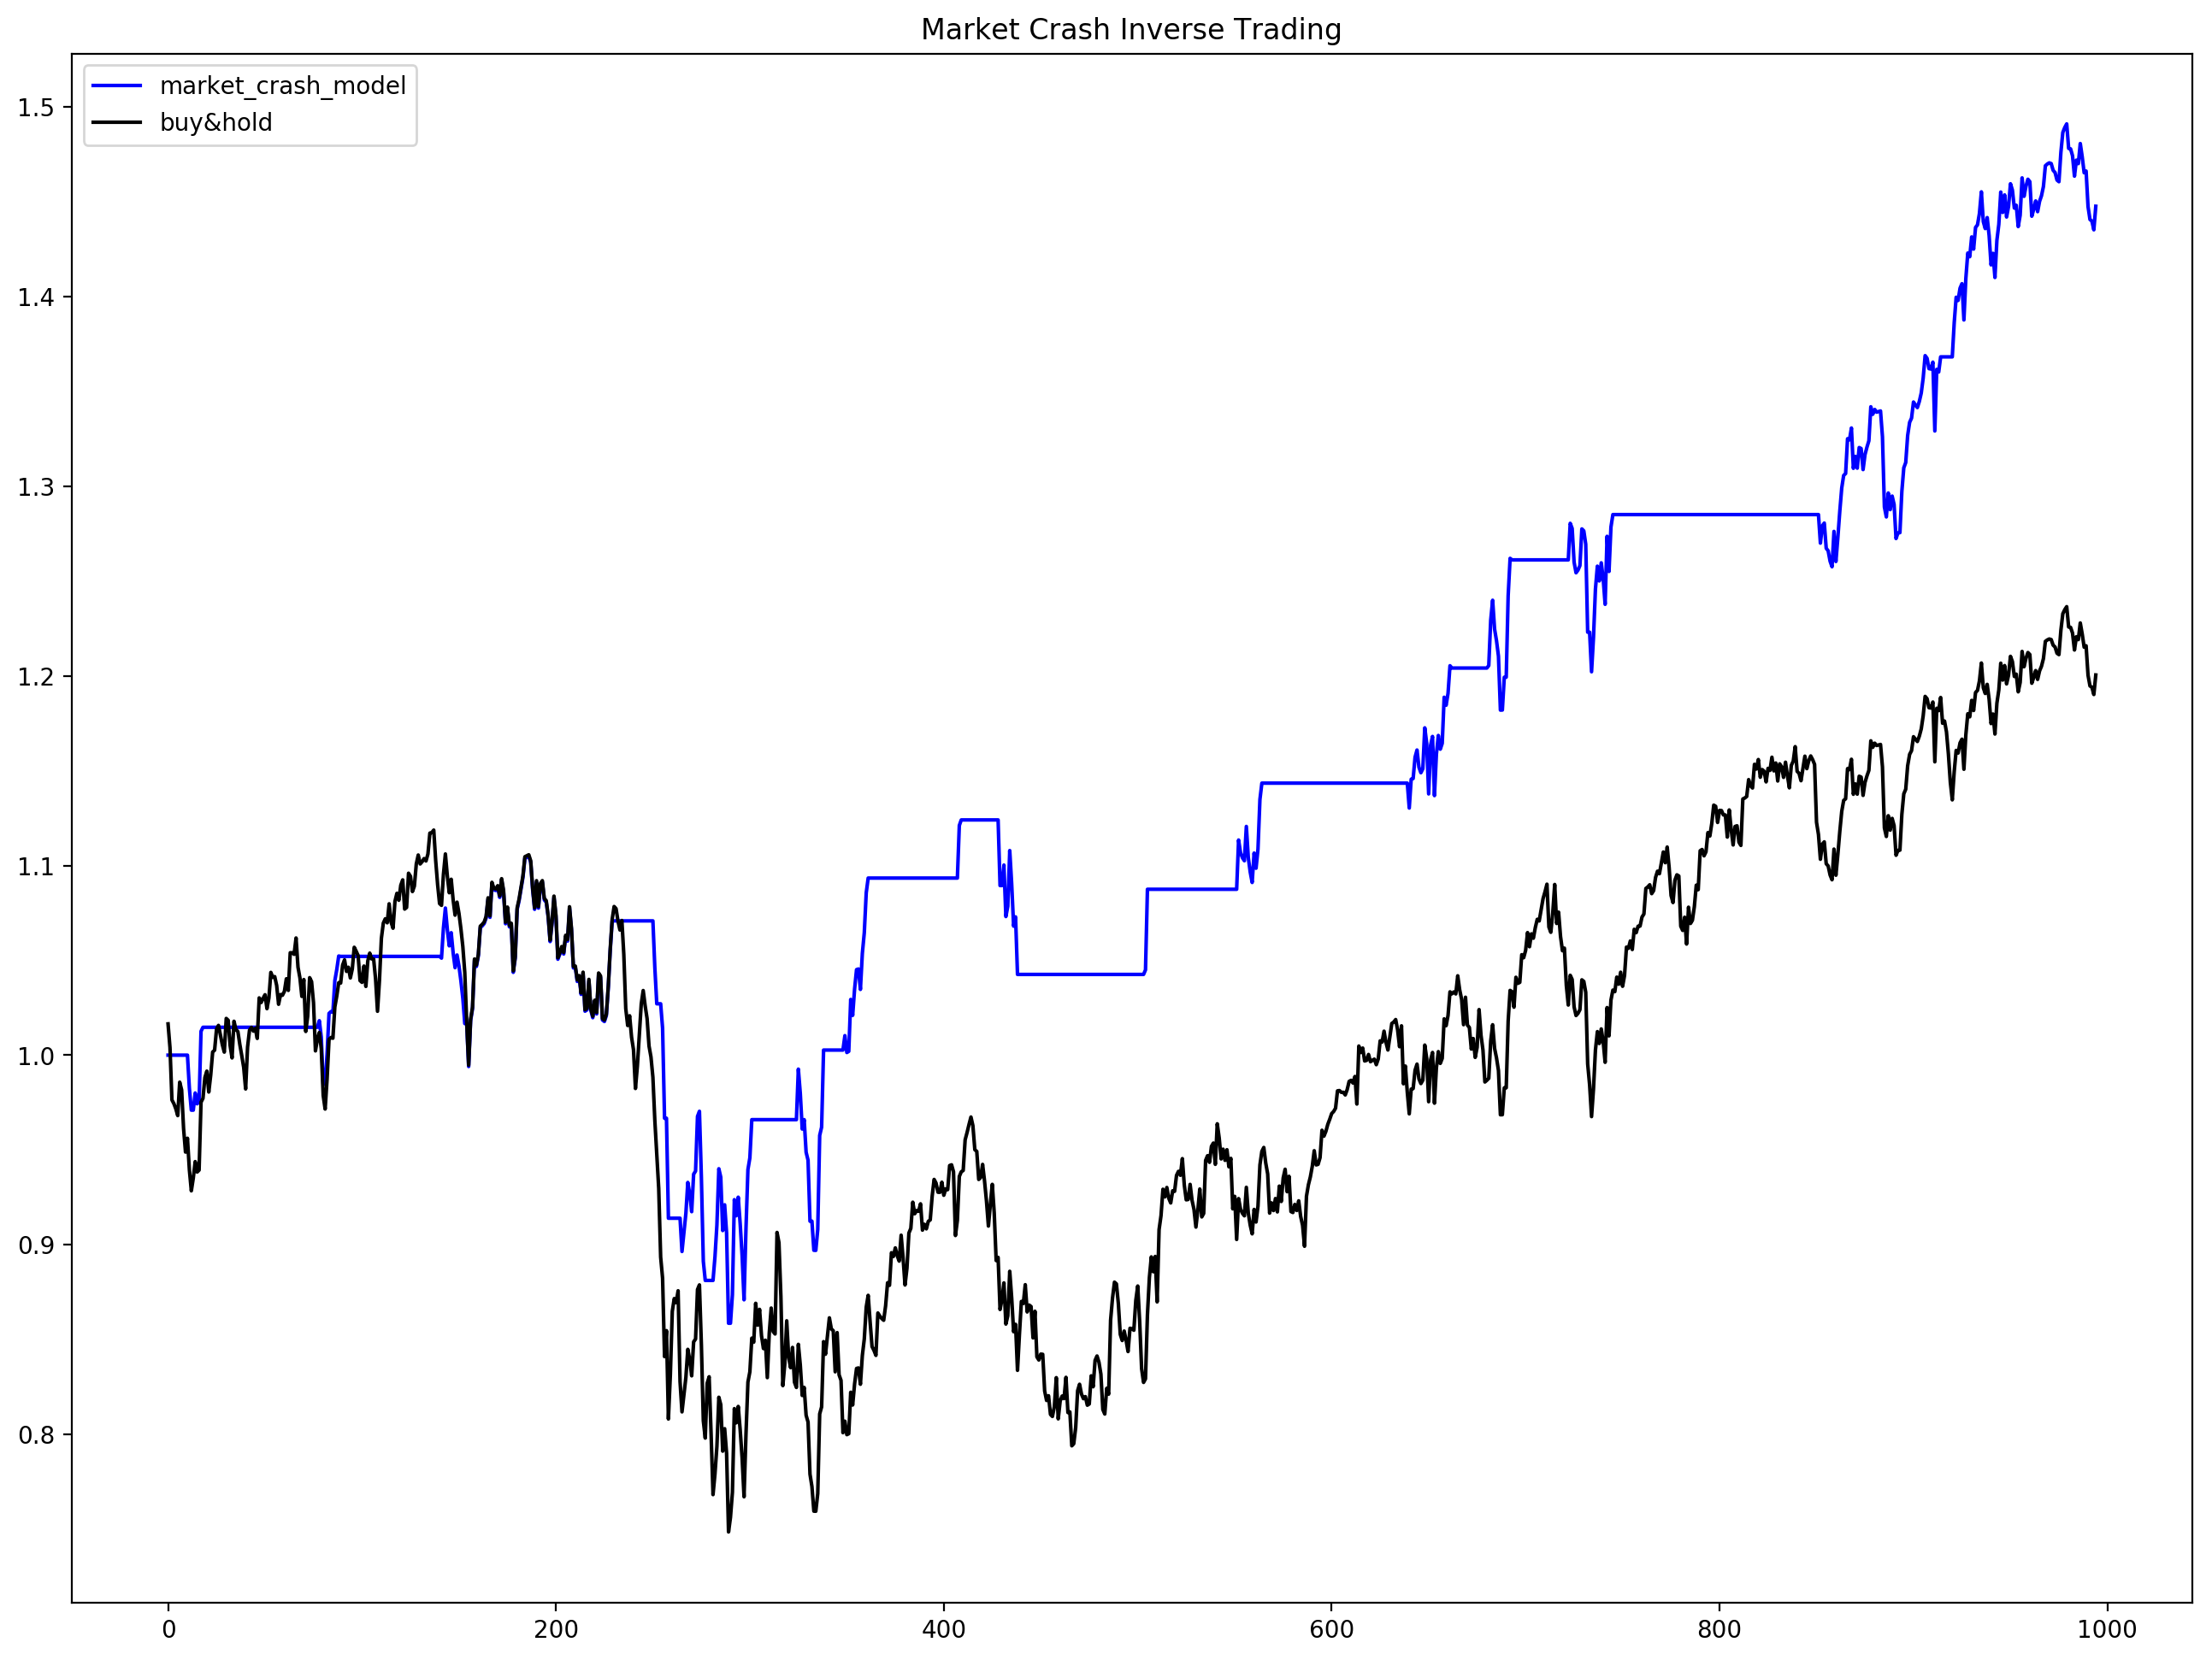

In [28]:
plt.figure(figsize=(16,12), dpi=200)
plt.title('Market Crash Inverse Trading')
plt.plot(log_ret, label='market_crash_model', color='blue')
plt.plot(log_bh, label='buy&hold', color='black')
plt.legend()
plt.savefig('FCHI_ret.png')
plt.show()